# Snow Depth - ICESat-2 Applications Tutorial

```{admonition} Learning Objectives
- gain experience in working with SlideRule to access and pre-process ICESat-2 data
- learn how use projections and interpolation to compare ICESat-2 track data with gridded raster products
- develop a general understanding of how to measure snow depths with LiDAR, and learn about opportunities and challenges when using ICEsat-2 along-track products
```

## Background
### How do we measure snow depth with LiDAR?
LiDAR is a useful tool for collecting high resolution snow depth maps over large spatial areas. 

Snow depth is measured from LiDAR by differencing a snow-free LiDAR map from snow-covered LiDAR map of the same area of interest.


```{figure} ./Images/DeemsLidarDifferencing.png
---
name: deems-lidar
---
Snow depth differencing calculation diagram from Deems et al.
```

```{figure} ./Images/Deems_snowpack_example.png
---
name: deems-snowpack
---
Example snow pack map from Deems et al.
```

### Can we do this with ICESat-2?
Yes! By differencing snow-covered ICESat-2 transects from snow-free maps we can calculate snow depths!

Calculating snow depth from ICESat-2 is a little different from other LiDAR snow depth methods as ICESat-2 is a transect of points not gridded raster data and ICESat-2 tracks do not repeat regularly in the mid-latitudes. So we need a independently collected snow-free map of our region of interest for comparison to ICESat-2 and we need to put our snow-free data in a form which it can be differenced from snow-on ICESat-2 data.

In this tutorial we will show an example of how to compare ICESat-2 data to raster data.


```{figure} ./Images/Zikan_DryCreek_map.png
---
name: zikan
---
Example of ICESat-2 tracks over a snow-free digital terrain model of Dry Creek Experimental Watershed (Zikan)
```

### What do we need to calculate snow depth from ICESat-2?
* A region of interest
* ICESat-2 data
* A snow-free reference DEM


### What are some of the things we need to think about when we compare ICESat-2 and Raster data?
**Geolocation:**
In order to have usable results it is important that ICESat-2 and the raster data are lined up properly. Even small ofsets can create large errors, and this effect gets worse in rugged terrain.


```{figure} ./Images/NuthKaab_DEMoffset.png
---
name: NuthKaab
---
Top: 2-D scheme of elevation differences induced by a DEM shift. Bottom: The scatter of elevation differences between 2 DEMs showing the relationship between the vertical deviations normalized by the slope tangent (y-axis) and terrain aspect (x-axis). (Nuth and Kääb)
```

**Vegetation:** 
Incorrectly categorized vegetation returns can positively bias our ground or snow surface estimation. Additionally dence vegetation can reduce the number of photon returns.

**Slope Affects:**
Rugged terrain increases uncertanty in ICESat-2 returns and increases the impact of offesets between ICESat-2 and the raster data, as shown in the above Nuth and Kääb figure. Additionally steep slopes can negatively bias our ground or snow surface estimation.

## Computing environment

We'll be using the following open source Python libraries in this notebook:

/tmp/ipykernel_380/879082968.py:2: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/latest/migration_pygeos.html).
  import geopandas as gpd
/srv/conda/envs/notebook/lib/python3.10/site-packages/geoviews/operation/__init__.py:14: HoloviewsDeprecationWarning: 'ResamplingOperation' is deprecated and will be removed in version 1.18, use 'ResampleOperation2D' instead.
  from holoviews.o

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
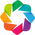

In [1]:
import rioxarray
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pyproj import CRS, Proj, transform, Transformer
from sliderule import sliderule, icesat2, earthdata, h5
from scipy.interpolate import RectBivariateSpline
from shapely import wkt

# Fancier plotting tools
from cartopy import crs
import geoviews as gv
import geoviews.feature as gf
from geoviews import dim, opts
import geoviews.tile_sources as gts
from bokeh.models import HoverTool
gv.extension('bokeh')

## Data

We will use SlideRule to acquire ATL06 data as well as the gridded data, noting customization for averaging footprint, photon identification: this will be a modified ATL06 download that includes some vegetation filtering


**Data considerations:**

To obtain snow depth with ICESat-2, we are going to use SlideRule for its high level of customization. We are going to look at snow depth data over the Arctic Coastal Plain (ACP) of Alaska, which is a relatively flat region with little vegetation. Thus, we should expect good agreement between ICESat-2 and our lidar rasters of interest.

## Initialize SlideRule

In [2]:
# Initialize SlideRule
icesat2.init("slideruleearth.io")

## Define Region of Interest

After we initialize SlideRule, we define our region of interest. Notice that there are two options in the cell below. This is because SlideRule accepts either the coordinates of a box/polygon or a geoJSON for the `region` input. 

We are going to use the `sliderule.icesat2.toregion()` function in this tutorial using a pre-generated polygon, but we have the secondary method included for your personal reference.

### Bounding box method

In [3]:
# Define region of interest over ACP, Alaska
region = [ {"lon":-148.85, "lat": 69.985},
           {"lon":-148.527, "lat": 69.985},
           {"lon":-148.527, "lat": 70.111},
           {"lon":-148.85, "lat": 70.111},
           {"lon":-148.85, "lat": 69.985} ]
region

[{'lon': -148.85, 'lat': 69.985},
 {'lon': -148.527, 'lat': 69.985},
 {'lon': -148.527, 'lat': 70.111},
 {'lon': -148.85, 'lat': 70.111},
 {'lon': -148.85, 'lat': 69.985}]

### geoJSON method

In [4]:
# Alternate method, with geoJSON
path = 'supplemental-data/'
region = sliderule.toregion(f'{path}acp_lidar_box.geojson')["poly"]
region

[{'lon': -148.7038119122077, 'lat': 69.9881603600183},
 {'lon': -148.5326070950319, 'lat': 70.0786897012734},
 {'lon': -148.6703586035892, 'lat': 70.1090427433155},
 {'lon': -148.8412106535782, 'lat': 70.01838230073595},
 {'lon': -148.7038119122077, 'lat': 69.9881603600183}]

## Build SlideRule request

Now we are going to build our SlideRule request by defining our ICESat-2 parameters. 

Since we want the ATL06 product we will use the `icesat2.atl06p()` function in this tutorial. You can find other SlideRule functions and more detail on the `icesat2.atl06p()` function on the [SlideRule API reference.](https://slideruleearth.io/web/rtd/api_reference/icesat2.html)

We won't use every parameter in this tutorial, but here is a reference list for some of them. More information can be found in the [SlideRule users guide](https://slideruleearth.io/web/rtd/user_guide/ICESat-2.html#parameters).

```{note} **Parameters**
* `poly`: polygon defining region of interest
* `track`: reference pair track number (1, 2, 3, or 0 to include for all three; defaults to 0)
* `rgt`: reference ground track (defaults to all if not specified)
* `cycle`: counter of 91-day repeat cycles completed by the mission (defaults to all if not specified)
* `region`: geographic region for corresponding standard product (defaults to all if not specified)
* `t0`: start time for filtering granules (format %Y-%m-%dT%H:%M:%SZ, e.g. 2018-10-13T00:00:00Z)
* `t1`: stop time for filtering granuels (format %Y-%m-%dT%H:%M:%SZ, e.g. 2018-10-13T00:00:00Z)
* `srt`: surface type: 0-land, 1-ocean, 2-sea ice, 3-land ice, 4-inland water
* `cnf`: confidence level for photon selection, can be supplied as a single value (which means the confidence must be at least that), or a list (which means the confidence must be in the list)
* `atl08_class`: list of ATL08 classifications used to select which photons are used in the processing (the available classifications are: “atl08_noise”, “atl08_ground”, “atl08_canopy”, “atl08_top_of_canopy”, “atl08_unclassified”)
* `maxi`: maximum iterations, not including initial least-squares-fit selection
* `H_min_win`: minimum height to which the refined photon-selection window is allowed to shrink, in meters
* `sigma_r_max`: maximum robust dispersion in meters
* `compact`: return compact version of results (leaves out most metadata)
```

```{warning}
**Warning: Interrupt the kernel if the following cell takes to long to run!**

If everyone runs this at once we might overwhelm SlideRule, an example dataframe is provided for this tutorial later
```

In [5]:
# Build SlideRule request
# Define parameters
parms = {
    "poly": region,
    "srt": icesat2.SRT_LAND,
    "cnf": icesat2.CNF_SURFACE_HIGH,
    "atl08_class": ["atl08_ground"],
    "ats": 5.0,
    "len": 20.0,
    "res": 10.0,
    "maxi": 5
}

# Calculated ATL06 dataframe
is2_df = icesat2.atl06p(parms, "nsidc-s3")

# Display top of the ICESat-2 dataframe
is2_df.head()

,distance,dh_fit_dx,rgt,pflags,cycle,spot,n_fit_photons,segment_id,h_sigma,w_surface_window_final,h_mean,rms_misfit,gt,dh_fit_dy,geometry
time,,,,,,,,,,,,,,,
2018-11-10 12:34:28.892227584,1.226097e+07,-0.020650,655,0,1,5,10,612118,0.082734,3.0,42.515685,0.261562,20,0.0,POINT (-148.79276 70.01618)
2018-12-12 22:17:07.551062272,7.807696e+06,-0.002470,1150,0,1,2,54,389532,0.015306,3.0,43.945144,0.111972,50,0.0,POINT (-148.67702 70.00233)
2018-12-12 22:17:07.552469760,7.807706e+06,-0.001858,1150,0,1,2,54,389533,0.014800,3.0,43.911763,0.107915,50,0.0,POINT (-148.67706 70.00242)
2018-12-12 22:17:07.553876480,7.807716e+06,-0.004367,1150,0,1,2,50,389533,0.016673,3.0,43.879276,0.117839,50,0.0,POINT (-148.67709 70.00251)
2018-12-12 22:17:07.555285760,7.807726e+06,-0.008977,1150,0,1,2,49,389534,0.021947,3.0,43.814805,0.152915,50,0.0,POINT (-148.67712 70.00260)


```{note} **Review:** In the above cell, what does each parameter we defined represent?
:class: dropdown

We defined our `region` above, so let's run through the remaining parameters:
* `srt`: Only land photons will be considered.
* `cnf`: Only high-confidence photons.
* `atl08_class`: Only ground photons, as identified by the ATL08 algorithm.
* `ats`: The maximum along-track spread (uncertainty) in aggregated photons will be 5 m.
* `len`: The length of each segment of aggregated photons will be 20 m.
* `res`: The along-track resolution will be 10 m. Because each segment will be 20 m long, there will be overlap between successive data points.
* `maxi`: The SlideRule refinement algorithm will iterate 5 times per segment at maximum.
```

### Subseting the data

You probably noticed that the algorithm took a long time to generate the GeoDataFrame. That is because (i) our region of interest was rather large and (ii) we obtained all ICESat-2 tracks in the ROI since its launch (2018).

For the sake of interest, let's take a look at all of the ICESat-2 tracks over ACP, Alaska.

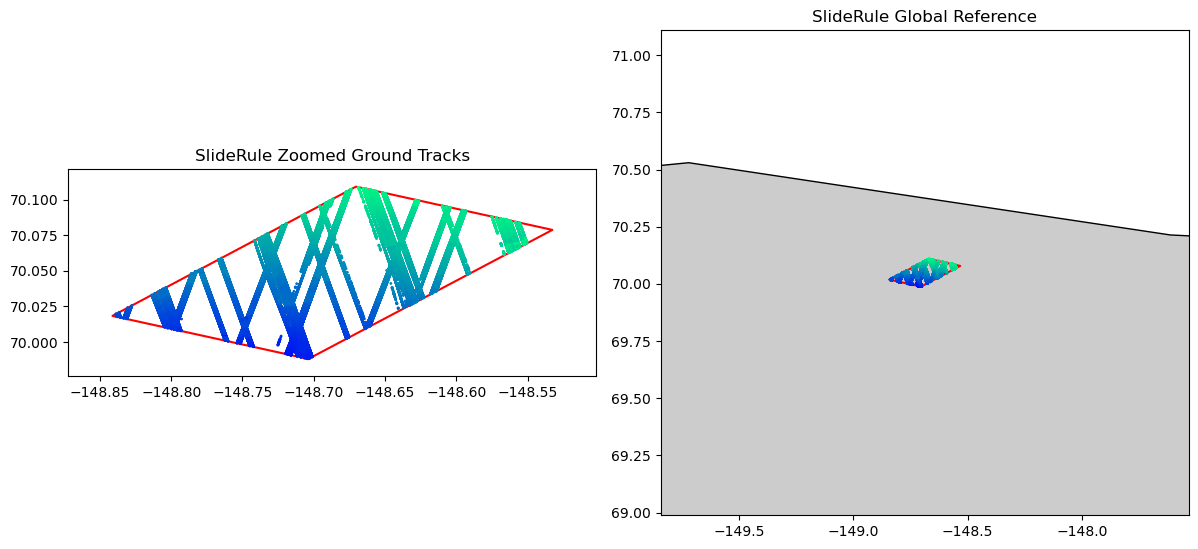

In [6]:
# Sample plot for all of the ICESat-2 tracks since its launch

# Calculate Extent
lons = [p["lon"] for p in region]
lats = [p["lat"] for p in region]
lon_margin = (max(lons) - min(lons)) * 0.1
lat_margin = (max(lats) - min(lats)) * 0.1

# Create Plot
fig,(ax1,ax2) = plt.subplots(num=None, ncols=2, figsize=(12, 6))
box_lon = [e["lon"] for e in region]
box_lat = [e["lat"] for e in region]

# Plot SlideRule Ground Tracks
ax1.set_title("SlideRule Zoomed Ground Tracks")
ROI = is2_df.plot(ax=ax1, column=is2_df["h_mean"], cmap='winter_r', s=1.0, zorder=3)
ax1.plot(box_lon, box_lat, linewidth=1.5, color='r', zorder=2)
ax1.set_xlim(min(lons) - lon_margin, max(lons) + lon_margin)
ax1.set_ylim(min(lats) - lat_margin, max(lats) + lat_margin)
ax1.set_aspect('equal', adjustable='box')


# Plot SlideRule Global View
ax2.set_title("SlideRule Global Reference")
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.plot(ax=ax2, color='0.8', edgecolor='black')
is2_df.plot(ax=ax2, column=is2_df["h_mean"], cmap='winter_r', s=1.0, zorder=3)
ax2.plot(box_lon, box_lat, linewidth=1.5, color='r', zorder=2)
ax2.set_xlim(min(lons)-1, max(lons)+1)
ax2.set_ylim(min(lats)-1, max(lats)+1)
ax2.set_aspect('equal', adjustable='box')

# Show Plot
plt.tight_layout()

It is cool to see all of the available data, but we only have lidar DEMs available from March 2022. So, we are going to subset the data to include one ICESat-2 track (**RGT 1097**) in **March 2022**.

In [7]:
# Subset ICESat-2 data to single RGT, time of year
is2_df_subset = is2_df[is2_df['rgt']==1097]
is2_df_subset = is2_df_subset.loc['2022-03']

# Display top of dataframe
is2_df_subset.head()

,distance,dh_fit_dx,rgt,pflags,cycle,spot,n_fit_photons,segment_id,h_sigma,w_surface_window_final,h_mean,rms_misfit,gt,dh_fit_dy,geometry
time,,,,,,,,,,,,,,,
2022-03-04 02:48:03.241118976,1.225157e+07,0.000780,1097,0,14,5,199,611652,0.009799,3.0,25.018173,0.138202,50,0.0,POINT (-148.67388 70.10714)
2022-03-04 02:48:03.242518016,1.225158e+07,0.002869,1097,0,14,5,195,611653,0.010362,3.0,25.020354,0.144591,50,0.0,POINT (-148.67391 70.10705)
2022-03-04 02:48:03.243916288,1.225159e+07,0.000026,1097,0,14,5,184,611653,0.011391,3.0,25.041014,0.154393,50,0.0,POINT (-148.67395 70.10696)
2022-03-04 02:48:03.245315328,1.225160e+07,0.002708,1097,0,14,5,179,611654,0.011574,3.0,25.073477,0.154308,50,0.0,POINT (-148.67398 70.10687)
2022-03-04 02:48:03.246711808,1.225161e+07,0.006243,1097,0,14,5,199,611654,0.010433,3.0,25.123777,0.146489,50,0.0,POINT (-148.67401 70.10678)


```{note} **Example Dataframe!**
Because there are so many of us, we might have overloaded the SlideRule server with the above request. If you were unable to generate a request, run the cell below to load pre-saved SlideRule data over the region of interest. This pre-saved file contains the exact same output that we would get if we ran the above cells.
```

In [8]:
# Read pre-saved SlideRule data into Pandas DataFrame
is2_df_subset = pd.read_csv(f'{path}sliderule_acp_rgt1097_20220304.csv')

# Convert geometry column into a format readable by GeoPandas
is2_df_subset['geometry'] = is2_df_subset['geometry'].apply(wkt.loads)

# Convert to a GeoDataFrame
is2_df_subset = gpd.GeoDataFrame(is2_df_subset, geometry='geometry', crs="EPSG:4326")

is2_df_subset.head()

,time,distance,spot,cycle,rgt,dh_fit_dy,pflags,h_sigma,w_surface_window_final,gt,n_fit_photons,h_mean,dh_fit_dx,rms_misfit,segment_id,geometry
0,2022-03-04 02:48:03.241118976,1.225157e+07,5,14,1097,0.0,0,0.009799,3.0,50,199,25.018173,0.000780,0.138202,611652,POINT (-148.67388 70.10714)
1,2022-03-04 02:48:03.242518016,1.225158e+07,5,14,1097,0.0,0,0.010362,3.0,50,195,25.020354,0.002869,0.144591,611653,POINT (-148.67391 70.10705)
2,2022-03-04 02:48:03.243916288,1.225159e+07,5,14,1097,0.0,0,0.011391,3.0,50,184,25.041014,0.000026,0.154393,611653,POINT (-148.67395 70.10696)
3,2022-03-04 02:48:03.245315328,1.225160e+07,5,14,1097,0.0,0,0.011574,3.0,50,179,25.073477,0.002708,0.154308,611654,POINT (-148.67398 70.10687)
4,2022-03-04 02:48:03.246711808,1.225161e+07,5,14,1097,0.0,0,0.010433,3.0,50,199,25.123777,0.006243,0.146489,611654,POINT (-148.67401 70.10678)


## Sample the DTM to ICESat-2 ground track 

Our ICESat-2 data is ready to go! Now it's time to load the airborne lidar data, and co-register it with ICESat-2.

The lidar data we will use is from the University of Alaska, Fairbanks (UAF). The UAF lidar obtains snow-on and snow-off DEMs/DTMs with a 1064 nm (near-infrared) laser, from which it can also derive snow depth. 

UAF lidar rasters normally have a spatial resolution of 0.5 m, which would take a long time to process for this tutorial. As a compromise between computation speed and resolution, we will use rasters that have been coarsened to 3 m resolution.

The best way to load lidar DEMs/DTMs is to use `rioxarray`:

### Load raster data

In [9]:
# File paths for UAF rasters
tifpath = '/home/jovyan/shared-public/ICESat-2-Hackweek/zachghiaccio/'
f_snow_off = f'{tifpath}coastalplain_2022aug31_dtm_3m.tif'
f_snow_on = f'{tifpath}coastalplain_2022mar12_snowdepth_3m.tif'

# Load files as rioxarray datasets
lidar_snow_off = rioxarray.open_rasterio(f_snow_off)
lidar_snow_on = rioxarray.open_rasterio(f_snow_on)

### Reproject coordinates so datasets can be compared

It is not immediately obvious, but the UAF rasters are in a different spatial projection than ICESat-2. UAF is in **EPSG:32606**, ICESat-2 is in **WGS84/EPSG:4326**.

In order to directly compare these two datasets, we are going to add reprojected coordinates to the ICESat-2 DataFrame. In essence, we will go from **latitude/longitude** to **northing/easting**. Luckily, there is an easy way to do this with GeoPandas, specifically the `geopandas.to_crs()` function.

In [10]:
# Initialize ICESat-2 coordinate projection
is2_df_subset = is2_df_subset.set_crs("EPSG:4326")

# Change to EPSG:32606
is2_df_subset = is2_df_subset.to_crs("EPSG:32606")

# Display top of dataframe
is2_df_subset.head()

,time,distance,spot,cycle,rgt,dh_fit_dy,pflags,h_sigma,w_surface_window_final,gt,n_fit_photons,h_mean,dh_fit_dx,rms_misfit,segment_id,geometry
0,2022-03-04 02:48:03.241118976,1.225157e+07,5,14,1097,0.0,0,0.009799,3.0,50,199,25.018173,0.000780,0.138202,611652,POINT (436440.828 7778693.972)
1,2022-03-04 02:48:03.242518016,1.225158e+07,5,14,1097,0.0,0,0.010362,3.0,50,195,25.020354,0.002869,0.144591,611653,POINT (436439.341 7778684.087)
2,2022-03-04 02:48:03.243916288,1.225159e+07,5,14,1097,0.0,0,0.011391,3.0,50,184,25.041014,0.000026,0.154393,611653,POINT (436437.853 7778674.203)
3,2022-03-04 02:48:03.245315328,1.225160e+07,5,14,1097,0.0,0,0.011574,3.0,50,179,25.073477,0.002708,0.154308,611654,POINT (436436.363 7778664.305)
4,2022-03-04 02:48:03.246711808,1.225161e+07,5,14,1097,0.0,0,0.010433,3.0,50,199,25.123777,0.006243,0.146489,611654,POINT (436434.874 7778654.421)


### Co-register rasters and ICESat-2

Now, we are going to co-register both rasters to the queried ICESat-2 data. The function below is fairly long, but the gist is that we are using a spline interpolant to match both the snow-off UAF data (surface height) and UAF snow depths with ICESat-2 surface heights. The resulting DataFrame will have both ICESat-2 and UAF data in it.

In [11]:
# Make coregistration function
def coregister_is2(lidar_snow_off, lidar_snow_depth, is2_df):
    """
    Co-registers UAF data with ICESat-2 data with a rectangular bivariate
    spline.

    Parameters
    ----------
    lidar_height : rioxarray dataset
        Lidar DEM/DTM in rioarray format.
    lidar_snow_depth : rioxarray dataset
        Lidar-derived snow depth in rioxarray format.
    is2_df : GeoDataFrame
        GeoDataFrame for the ICESat-2 data generated with SlideRule.

    Returns
    -------
    is2_uaf_df : GeoDataFrame
        Contains the coordinate and elevation data that matches best with
        ICESat-2.

    """
    
    # Define x/y coordinates from snow-off data
    x0 = np.array(lidar_snow_off.x)
    y0 = np.array(lidar_snow_off.y)
    
    # Do the same, but for snow depth data
    xs = np.array(lidar_snow_on.x)
    ys = np.array(lidar_snow_on.y)
    
    # Filter NaNs that would otherwise mess up the interpolators
    dem_heights = np.array(lidar_snow_off.sel(band=1))[::-1,:]
    dem_heights[np.isnan(dem_heights)] = -9999
    dem_depths = np.array(lidar_snow_depth.sel(band=1))[::-1,:]
    dem_depths[np.isnan(dem_depths)] = -9999
    
    # Generate interpolators
    interp_height = RectBivariateSpline(np.array(y0)[::-1], 
                                       np.array(x0),
                                       dem_heights)
    interp_depth = RectBivariateSpline(np.array(ys)[::-1],
                                       np.array(x0),
                                       dem_depths)
    
    # Use constructed interpolators to align UAF with ICESat-2. This aligns with all six
    # ICESat-2 beams
    is2_uaf_df = pd.DataFrame()
    for beam in np.unique(is2_df['gt']):
        is2_tmp = is2_df.loc[is2_df['gt']==beam]
            
        # ICESat-2 x/y coordinates
        xn = is2_tmp.geometry.x
        yn = is2_tmp.geometry.y
            
        # Define indices within x/y bounds of DEM
        i1 = (xn>np.min(x0)) & (xn<np.max(x0))
        i1 &= (yn>np.min(y0)) & (yn<np.max(y0))
        
        lidar_height = interp_height(yn[i1], xn[i1], grid=False)
        lidar_snow_depth = interp_depth(yn[i1], xn[i1], grid=False)
        # Set x/y coordinates, UAF height/snow depth, and ICESat-2 heights into same DataFrame
        tmp = gpd.GeoDataFrame(data={'x': xn[i1],
                                     'y': yn[i1],
                                     'time': is2_tmp.index.values[i1],
                                     'beam': is2_tmp['gt'][i1],
                                     'lidar_height': lidar_height,
                                     'lidar_snow_depth': lidar_snow_depth,
                                     'is2_height': is2_tmp['h_mean'][i1],
                                     'h_sigma': is2_tmp['h_sigma'][i1],
                                     'dh_fit_dx': is2_tmp['dh_fit_dx'][i1]})
        
        # Concatenate coregistered data to DataFrame
        is2_uaf_df = pd.concat([is2_uaf_df, tmp])
        
        # Add latitude/longitude coordinates to new DataFrame
        transformer = Transformer.from_crs("EPSG:32606", "EPSG:4326", always_xy=True)
        is2_uaf_df['lon'], is2_uaf_df['lat'] = transformer.transform(is2_uaf_df['x'],
                                                                     is2_uaf_df['y'])
        
    return is2_uaf_df
                                     

In [12]:
# Co-register ICESat-2 and UAF using the above function
is2_uaf_df = coregister_is2(lidar_snow_off, lidar_snow_on, is2_df_subset)

# Convert to a GeoDataFrame
geom = gpd.points_from_xy(is2_uaf_df.lon, is2_uaf_df.lat)
is2_uaf_gpd = gpd.GeoDataFrame(is2_uaf_df,
                               geometry=geom, 
                               crs="EPSG:4326")

# Display top of dataframe
is2_uaf_gpd.head()

,x,y,time,beam,lidar_height,lidar_snow_depth,is2_height,h_sigma,dh_fit_dx,lon,lat,geometry
142,439452.923543,7.776921e+06,142,30,26.683965,0.457813,27.205629,0.010734,0.001480,-148.593376,70.091971,POINT (-148.59338 70.09197)
144,439451.375043,7.776911e+06,144,30,26.696361,0.423185,27.192147,0.010345,-0.004178,-148.593410,70.091882,POINT (-148.59341 70.09188)
146,439449.823397,7.776901e+06,146,30,26.718985,0.515149,27.234907,0.011003,0.011683,-148.593444,70.091794,POINT (-148.59344 70.09179)
148,439448.267944,7.776892e+06,148,30,26.713260,0.620624,27.337950,0.010929,0.009041,-148.593478,70.091705,POINT (-148.59348 70.09170)
150,439446.713865,7.776882e+06,150,30,26.739161,0.638703,27.389371,0.011256,0.004028,-148.593512,70.091616,POINT (-148.59351 70.09162)


As you can see, we now have a DataFrame that includes several useful variables:
* `beam`: ICESat-2 beam (gt1l, gt2l, etc.)
* `lidar_height`: Snow-off surface height from UAF lidar.
* `lidar_snow_depth`: Snow depth derived from UAF.
* `is2_height`: ICESat-2 surface height (snow-on, in this case).
* `h_sigma`: ICESat-2 height uncertainty.
* `dh_fit_dx`: Along-track slope of the terrain.

With this DataFrame, it will now be very simple to derive snow depth!

## Differencing to get a snowdepth
To derive snow depth with ICESat-2, we need a snow-off DEM and ICESat-2 observations over a snow-covered surface. The variable `lidar_height` in our DataFrame is the snow-off DEM co-registered with ICESat-2, and we subsetted our SlideRule data to specifically look at ACP during snow-on conditions.

Thus, deriving snow depth is now as simple as taking the difference between `is2_height` and `lidar_height`:

In [13]:
# Derive snow depth using snow-on/snow-off differencing
is2_uaf_gpd['is2_snow_depth'] = is2_uaf_gpd['is2_height'] - is2_uaf_gpd['lidar_height']

# Estimate the difference (bias) between IS-2 depths and UAF depths
is2_uaf_gpd['snow_depth_residual'] = is2_uaf_gpd['is2_snow_depth'] - is2_uaf_gpd['lidar_snow_depth']

## Visualize the result
Horray! we finally have snow ICESat-2 snow depths! Let's make a couple of plots with the data we have.

Text(105.34722222222221, 0.5, 'Latitude')

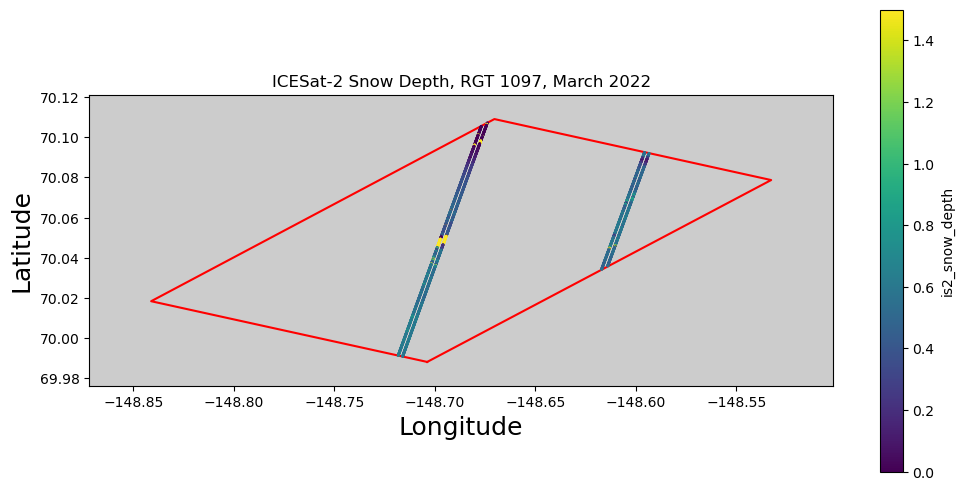

In [14]:
## Map Plot

# Create Plot
fig,ax = plt.subplots(num=None, figsize=(12, 6))
box_lon = [e["lon"] for e in region]
box_lat = [e["lat"] for e in region]
lons = [p["lon"] for p in region]
lats = [p["lat"] for p in region]
lon_margin = (max(lons) - min(lons)) * 0.1
lat_margin = (max(lats) - min(lats)) * 0.1

# Plot SlideRule Ground Tracks
ax.set_title("ICESat-2 Snow Depth, RGT 1097, March 2022")
is2_uaf_gpd.plot.scatter(ax=ax, x='lon', y='lat', c='is2_snow_depth',
                             s=1.0, zorder=3, vmin=0, vmax=1.5)
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.plot(ax=ax, color='0.8', edgecolor='black')
ax.plot(box_lon, box_lat, linewidth=1.5, color='r', zorder=2)
ax.set_xlim(min(lons) - lon_margin, max(lons) + lon_margin)
ax.set_ylim(min(lats) - lat_margin, max(lats) + lat_margin)
ax.set_aspect('equal', adjustable='box')
ax.set_xlabel('Longitude', fontsize=18)
ax.set_ylabel('Latitude', fontsize=18)

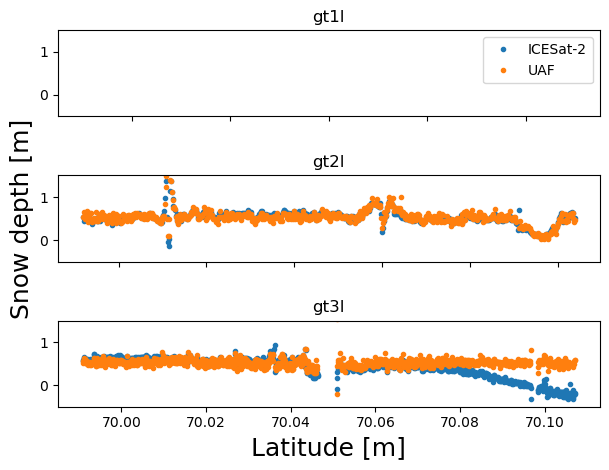

In [15]:
## Along-track snow depth comparison
# Plot snow depths for the three strong beams
fig, (ax1,ax2,ax3) = plt.subplots(3)

# Left strong beam
tmp_df = is2_uaf_gpd[is2_uaf_gpd['beam']==10]
ax1.plot(tmp_df['lat'], tmp_df['is2_snow_depth'], '.', label='ICESat-2')
ax1.plot(tmp_df['lat'], tmp_df['lidar_snow_depth'], '.', label='UAF')
ax1.set_title('gt1l')
ax1.legend()

# Central strong beam
tmp_df = is2_uaf_gpd[is2_uaf_gpd['beam']==30]
ax2.plot(tmp_df['lat'], tmp_df['is2_snow_depth'], '.')
ax2.plot(tmp_df['lat'], tmp_df['lidar_snow_depth'], '.')
ax2.set_ylabel('Snow depth [m]', fontsize=18)
ax2.set_title('gt2l')

# Right strong beam
tmp_df = is2_uaf_gpd[is2_uaf_gpd['beam']==50]
ax3.plot(tmp_df['lat'], tmp_df['is2_snow_depth'], '.')
ax3.plot(tmp_df['lat'], tmp_df['lidar_snow_depth'], '.')
ax3.set_xlabel('Latitude [m]', fontsize=18)
ax3.set_title('gt3l')
plt.tight_layout()

# Only include outer axis labels
for axs in [ax1, ax2, ax3]:
    axs.label_outer()
    axs.set_ylim([-0.5, 1.5])

**Question for everyone**: There's nothing plotted for the left strong beam! Why is that? (hint: look at the map figure)

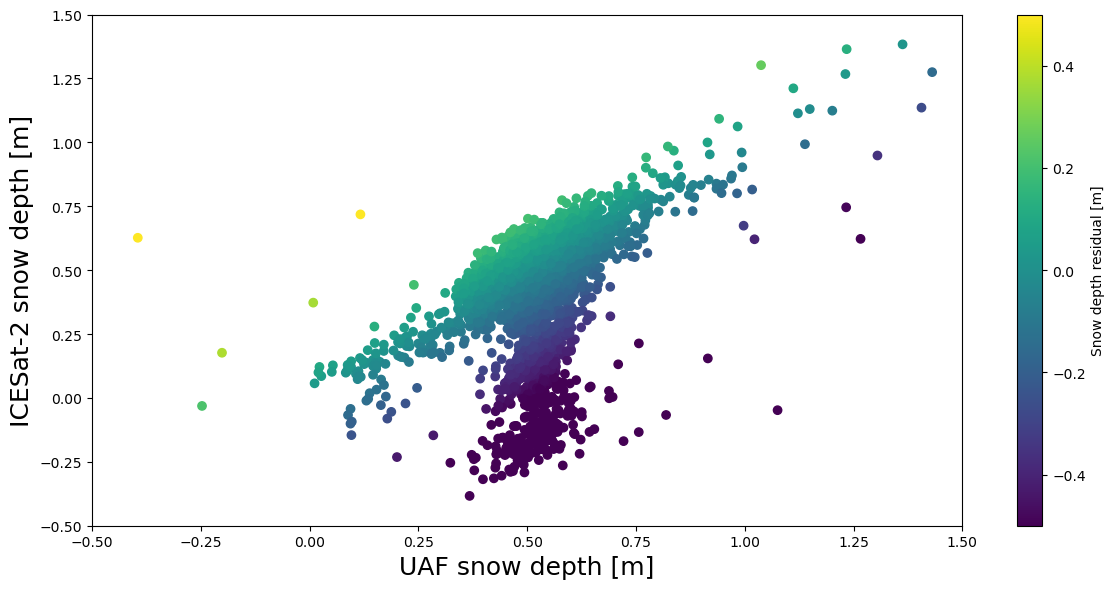

In [16]:
## Scatter plot of ICESat-2 depths vs. UAF depths
fig, ax = plt.subplots(figsize=(12,6))
s = ax.scatter(is2_uaf_gpd['lidar_snow_depth'], is2_uaf_gpd['is2_snow_depth'],
               c=is2_uaf_gpd['snow_depth_residual'], vmin=-0.5, vmax=0.5)
ax.set_xlabel('UAF snow depth [m]', fontsize=18)
ax.set_ylabel('ICESat-2 snow depth [m]', fontsize=18)
ax.set_xlim([-0.5, 1.5])
ax.set_ylim([-0.5, 1.5])
cbar = fig.colorbar(s, ax=ax)
cbar.set_label('Snow depth residual [m]')
plt.tight_layout()

It's not perfect thanks to a few oddities in gt3l, but otherwise the scatter plot looks great!

As a last step, let's add make an interactive plot using Holoviews/Geoviews. This isn't strictly necessary and can be somewhat complex. But the Holoviews and Geoviews packages are nice tools for visualizing data.

In [17]:
### Read in the SnowEx lidar boxes
lidar_box = gpd.read_file(f'{path}snowex_lidar_swaths.shp')

# Geoviews map of snow depth over site
hover = HoverTool(tooltips=[('ICESat-2 depth', '@is2_snow_depth'),
                            ('UAF depth', '@lidar_snow_depth')])

# Create polygon of lidar box over map
lidar_box_poly = gv.Polygons(lidar_box).opts(color='white',
                                             alpha=0.5)

# Convert GeoDataFrame to a format plottable by Geoviews
points_on_map = gv.Points(is2_uaf_gpd, 
                          kdmins=['Longitude', 'Latitude'],
                          vdmins=['snow_depth_residual']).opts(tools=[hover],
                                                               color_index='snow_depth_residual',
                                                               colorbar=True,
                                                               clabel='IS2-UAF depth residual [m]',
                                                               size=4.0,
                                                               fontscale=1.5,
                                                               clim=(-0.5,0.5))


# Project data onto Mercator projection
projected = gv.operation.project(points_on_map, projection=crs.GOOGLE_MERCATOR)

# Use ESRI imagery for a tile set
world_map = gts.EsriImagery.opts(width=600, height=570)

# Generate the map figure
map_fig = (world_map * lidar_box_poly * projected).opts(xlim=(projected.data.Longitude.min()-10000, projected.data.Longitude.max()+10000),
                                                          ylim=(projected.data.Latitude.min()-10000, projected.data.Latitude.max()+10000))

map_fig

:Overlay
   .WMTS.I     :WMTS   [Longitude,Latitude]
   .Polygons.I :Polygons   [Longitude,Latitude]
   .Points.I   :Points   [Longitude,Latitude]   (x,y,time,beam,lidar_height,lidar_snow_depth,is2_height,h_sigma,dh_fit_dx,lon,lat,is2_snow_depth,snow_depth_residual)

## Summary

 🎉 Congratulations! You've completely this tutorial and have seen how to compare ICESat-2 to raster data, how to calculate ICESat-2 ATL06 products using SlideRule, and how to calculate snow depths from ICESat-2 data.

## References

To further explore the topics of this tutorial see the following detailed documentation:

* [SlideRule Website](https://slideruleearth.io/web/)
* [SlideRule online demo](https://demo.slideruleearth.io)

**Papers**

Deems, Jeffrey S., et al. “Lidar Measurement of Snow Depth: A Review.” Journal of Glaciology, vol. 59, no. 215, 2013, pp. 467–79. DOI.org (Crossref), https://doi.org/10.3189/2013JoG12J154.

Nuth, C., and A. Kääb. “Co-Registration and Bias Corrections of Satellite Elevation Data Sets for Quantifying Glacier Thickness Change.” The Cryosphere, vol. 5, no. 1, Mar. 2011, pp. 271–90. DOI.org (Crossref), https://doi.org/10.5194/tc-5-271-2011.
